# Data Compression - Dimensionality Reduction - SkLearn

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_wine = pd.read_csv('/Users/tkmacl9/Desktop/Patents_Research_Papers_Personalization/All_Machine_Learning/wine_UCI.csv', header=None)
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 
                   'Flavanoids','Nonflavanoid phenols', 'Proanthocyanins', 
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

### Doing the Steps in a PCA from scratch --

1. Transform the Data to StandardScaler - Mean 0
2. Find the Covariance Matrix
3. Find the Eigen Values and Eigen Vectors of the Covariance Matrix
4. Select K eigen vectors corresponding to the k largest eigen values
5. Costruct a k Projection matrix W from the top k eigen vectors
6. Using the Projection Matrix W , transform the Training and the test data to obtain the k-dimensional feature subspace

In [11]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [53]:
# Find the Covariance matrix which is a 13 X 13 matrix, between the fatures of the wine data set
# We then find the set of the Eigen values and the eigen vectors from the Covariance Matrix
# using the linear algebra package in sklearn numpy
cov_mat = np.cov(X_test_std.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
print "Eigen Values  \n %s \n" % eigen_values
print "Eigen Vectors  \n %s \n" % eigen_vectors

Eigen Values  
 [ 4.5587553   2.65338926  1.33002158  1.12549719  0.7955333   0.55208871
  0.43040117  0.25178108  0.21781015  0.17581265  0.15631419  0.11659798
  0.1073023 ] 

Eigen Vectors  
 [[ 0.16886997 -0.467317    0.4016489  -0.08694502 -0.01138094 -0.41180617
   0.12496363  0.30108147  0.31739672 -0.35361088 -0.26417715 -0.11252234
  -0.00211917]
 [-0.21261403 -0.19813765  0.08483604  0.41235989 -0.57891822 -0.29726441
  -0.26161843 -0.16286142  0.19537765  0.31703974  0.16626559  0.07669211
  -0.21818773]
 [ 0.10688017 -0.32699677 -0.6238769  -0.00553525 -0.24003186 -0.01122774
   0.24784658 -0.12364948  0.07155087  0.00952197 -0.37346795  0.34858183
   0.30288686]
 [-0.11959163 -0.0649219  -0.43893358  0.32258864  0.08513528 -0.06861996
   0.36011143 -0.03721172  0.07325493 -0.40841489  0.29944635 -0.38917874
  -0.35838246]
 [ 0.20917585 -0.34175904 -0.16896007 -0.08457399 -0.21048389  0.50593302
  -0.26588456  0.49499492  0.13305666  0.08885728  0.30934111 -0.23764862
   0.

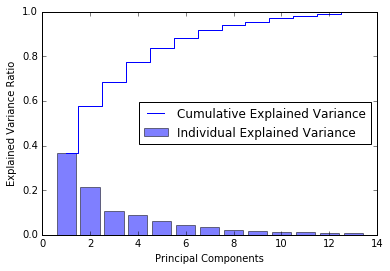

In [55]:
# Plot the values of Eigen Values and the Cumulative sum of the Eigen Values in a plot
import matplotlib.pyplot as plt
%matplotlib inline
total = sum(eigen_values)
var_exp = [(i/total) for i in sorted(eigen_values, reverse=True)]
# print eigen_values_perc
cum_var_exp = np.cumsum(eigen_values_perc)
# print eigen_values_cum_sum
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(1,14), cum_var_exp, where='mid', label="Cumulative Explained Variance")
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.show()

In [86]:
# Feature Transformation - Compute the Projection Matrix and convert the train and test data and plot
# the data points for PC1 and PC2 - principal Component 1 and Principal Component 2
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
eigen_pairs.sort(reverse=True)
print eigen_pairs
print ''
#test the operations on eigen_pairs
print eigen_pairs[0][1]
print ''
print eigen_pairs[0][1][:,np.newaxis] # Accesses the second element of the pair / tuple

[(4.5587552959294246, array([ 0.16886997, -0.21261403,  0.10688017, -0.11959163,  0.20917585,
        0.46927644,  0.45280381, -0.26575707,  0.28469472, -0.01765874,
        0.22578123,  0.35870944,  0.31608088])), (2.6533892610277543, array([-0.467317  , -0.19813765, -0.32699677, -0.0649219 , -0.34175904,
        0.0751629 ,  0.1085427 , -0.11467956,  0.01508968, -0.48236626,
        0.26396008,  0.19081663, -0.38058128])), (1.3300215750861755, array([ 0.4016489 ,  0.08483604, -0.6238769 , -0.43893358, -0.16896007,
       -0.08734341, -0.17194072, -0.38269125, -0.01636541,  0.0322001 ,
       -0.11171038, -0.0034401 ,  0.15364776])), (1.1254971940250904, array([-0.08694502,  0.41235989, -0.00553525,  0.32258864, -0.08457399,
        0.17415461,  0.14328242, -0.42245888,  0.27978305,  0.15567829,
       -0.49394353,  0.1238968 , -0.34637691])), (0.79553329981356835, array([-0.01138094, -0.57891822, -0.24003186,  0.08513528, -0.21048389,
        0.19056186,  0.00848732,  0.19458028,  0.

In [87]:
# Accesses the second element of the pair / tuple for the first and second row, since the first and second row
# are the ones with the highest Eigen values, and then transform them to a new axis.
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis])) 
print w

[[ 0.16886997 -0.467317  ]
 [-0.21261403 -0.19813765]
 [ 0.10688017 -0.32699677]
 [-0.11959163 -0.0649219 ]
 [ 0.20917585 -0.34175904]
 [ 0.46927644  0.0751629 ]
 [ 0.45280381  0.1085427 ]
 [-0.26575707 -0.11467956]
 [ 0.28469472  0.01508968]
 [-0.01765874 -0.48236626]
 [ 0.22578123  0.26396008]
 [ 0.35870944  0.19081663]
 [ 0.31608088 -0.38058128]]


(124, 2)

(124,)


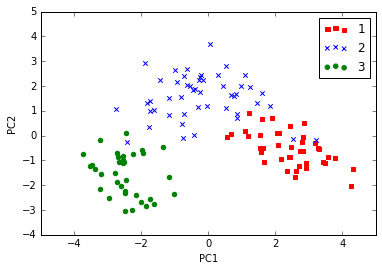

In [113]:
# Transform the X_train_std with the W Projection matrix
X_train_std[0].dot(w)
X_train_pca = X_train_std.dot(w)
print X_train_pca.shape
print ''
print y_train.shape
# Visualize the points in 2 dimensional Principal Components
colors = ['r', 'b', 'g']
shapes = ['s', 'x', 'o']
for l,c,m in zip(np.unique(y_train), colors, shapes):
    # The X_train_pca[y_train==l,0] picks all the X_train_pca vectors for which the label is 1, 2 or 3 and scatter 
    # plots the first column of the X_train_pca with the second column of the X_train_pca
    plt.scatter(X_train_pca[y_train==l,0], X_train_pca[y_train==l,1], color=c,label=l, marker=m)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best')
plt.show()

### Repeat all the Above Steps in Scikit Learn - using the Transformer class

In [115]:
# Same Decision Boundary code used in previous Ipython Notebook

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

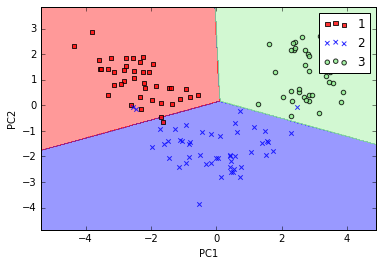

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca_new = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca_new, y_train)
plot_decision_regions(X_train_pca_new, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best')
plt.show()

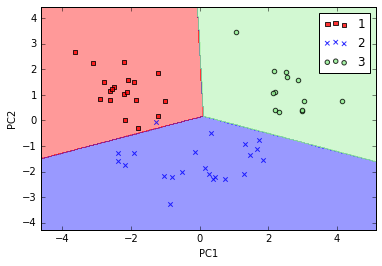

In [123]:
# Plot the Decision Boundary for the Test Data set
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best')
plt.show()